# **NYPD Nefret Suçları Analizi**

Bu proje, **NYPD**'deki suçlar üzerine çeşitli faktörlerin analizini içeriyor.

## **Veri Kümesi Hakkında**
Veri kümesi önceden temizlenmemiştir.**NYPD** tarafından gerçekleştirilen **Nefret Suçları** listesini içerir. `13` özellikten oluşur. Bunlardan bazıları:
- **Tam Şikayet Kimliği (Full Complaint ID):** Benzersiz bir şikayet kimliği sağlar.
- **Şikayet Yıl Numarası (Complaint Year Number):** Şikayet yılını sağlar.
- **Ay Numarası (Month Number):** Şikayet ayını sağlar.
- **Kayıt Oluşturma Tarihi (Record Create Date):** Kayıt oluşturma tarihini sağlar.
- **Şikayet Polis Karakolu Kodu (Complaint Precinct Code):** Şikayet karakolu kodunu sağlar.

NYPD nefret suçu veri analizi, bu olayların zamansal desenlerini, zaman içindeki değişiklikler gibi, ve coğrafi dağılımını, nefret suçlarının daha yüksek yoğunlukta olduğu alanları belirleyerek incelemektedir. Suçların ayrıntılarını incelemek, suç türleri, ilişkili kanun kodları, suçların arkasındaki önyargı nedenleri ve tutuklama eğilimleri gibi, bu olayların doğasını ve polisin nasıl yanıt verdiğini daha derinlemesine anlamamızı sağlar.

# **Kütüphanelerin ve Verinin İçe Aktarılması**
---
Burada, projemiz için gerekli tüm `kütüphaneleri` ve tüm gerekli `kaynak dosyaları` içe aktarılacaktır.

In [1]:
import numpy as np      
import pandas as pd     
import seaborn as sns   
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("nypd_hate_crimes.csv")
df.head()


,Full Complaint ID,Complaint Year Number,Month Number,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,PD Code Description,Bias Motive Description,Offense Category,Arrest Date,Arrest Id
0,202206012204617,2022,3,03/07/2022,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
1,202006012153917,2020,2,02/08/2020,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
2,202306012418117,2023,5,05/23/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
3,202306012285217,2023,4,04/02/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN
4,202306012358417,2023,4,05/01/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,AGGRAVATED HARASSMENT 1,ANTI-JEWISH,Religion/Religious Practice,NaN,NaN


Korelasyon Matrisi

Bu verinin analiz edilmeden önce daha fazla `temizlenmesi` ve `işlenmesi` gerekmektedir.

# **Veri Temizleme**
---
Bu bölümde, tüm `boş değerleri` uygun önlemlerle temizliyoruz.

In [2]:
# sütun bilgisine bakma
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2406 entries, 0 to 2405
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Full Complaint ID              2406 non-null   int64  
 1   Complaint Year Number          2406 non-null   int64  
 2   Month Number                   2406 non-null   int64  
 3   Record Create Date             2406 non-null   object 
 4   Complaint Precinct Code        2406 non-null   int64  
 5   Patrol Borough Name            2406 non-null   object 
 6   County                         2406 non-null   object 
 7   Law Code Category Description  2406 non-null   object 
 8   Offense Description            2406 non-null   object 
 9   PD Code Description            2406 non-null   object 
 10  Bias Motive Description        2406 non-null   object 
 11  Offense Category               2406 non-null   object 
 12  Arrest Date                    0 non-null      f

Toplam 2406 satır ve 13 sütun bulunmaktadır.

NOT: **Tutuklama Tarihi (Arrest Date)** ve **Tutuklama Kimliği (Arrest Id)** sütunları çok düşük veri noktasına sahip olduğundan kaldırılmalıdır.


# **Veri Ön İşleme**
---

## **1. Yalnızca ilgili sütunların seçilmesi**
Burada, yalnızca gerekli sütunları seçiyoruz.

In [3]:
df.columns
df = df[['Record Create Date', 'Complaint Precinct Code', 'Patrol Borough Name', 'County', 'Law Code Category Description', 'Offense Description',
       'Bias Motive Description', 'Offense Category']]
df.head()

,Record Create Date,Complaint Precinct Code,Patrol Borough Name,County,Law Code Category Description,Offense Description,Bias Motive Description,Offense Category
0,03/07/2022,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice
1,02/08/2020,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice
2,05/23/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice
3,04/02/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice
4,05/01/2023,60,PATROL BORO BKLYN SOUTH,KINGS,FELONY,MISCELLANEOUS PENAL LAW,ANTI-JEWISH,Religion/Religious Practice


## **2. Tarih-saat verilerinin çıkarılması**
Verilen tarih-saat verilerinden Tarih, Ay ve Yıl bilgilerini çıkarıyoruz.


In [4]:
df.head()
# tarihi tarih-zaman biçimine dönüştürme
df['record_date'] = pd.to_datetime(df['Record Create Date'], format='mixed')

# haftanın gününü, tarihi, ayı ve yılı ayrı sütunlara ayırma
df['date'] = df['record_date'].dt.day
df['day'] = df['record_date'].dt.strftime('%a')
df['month'] = df['record_date'].dt.strftime('%b')
df['year'] = df['record_date'].dt.year
df.head()
# özellik listesini sıralama
df = df[['date', 'month', 'year', 'day', 'record_date', 'Patrol Borough Name', 'County', 'Law Code Category Description',
         'Bias Motive Description', 'Offense Category', 'Complaint Precinct Code']]

df.head()


,date,month,year,day,record_date,Patrol Borough Name,County,Law Code Category Description,Bias Motive Description,Offense Category,Complaint Precinct Code
0,7,Mar,2022,Mon,2022-03-07,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
1,8,Feb,2020,Sat,2020-02-08,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
2,23,May,2023,Tue,2023-05-23,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
3,2,Apr,2023,Sun,2023-04-02,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
4,1,May,2023,Mon,2023-05-01,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60


## **3. Sütunların Yeniden Adlandırılması**
Sütun adlarını daha basit bir şeye yeniden adlandırıyoruz.

In [5]:
# mevcut sütun adlarına bakma
df.columns
# sütunları yeniden adlandırma
df.columns = ['date', 'month', 'year', 'day', 'record_date', 'patrol', 'county', 'crime', 'motive', 'offense', 'precinct']
df.head()


,date,month,year,day,record_date,patrol,county,crime,motive,offense,precinct
0,7,Mar,2022,Mon,2022-03-07,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
1,8,Feb,2020,Sat,2020-02-08,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
2,23,May,2023,Tue,2023-05-23,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
3,2,Apr,2023,Sun,2023-04-02,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60
4,1,May,2023,Mon,2023-05-01,PATROL BORO BKLYN SOUTH,KINGS,FELONY,ANTI-JEWISH,Religion/Religious Practice,60


## **4. Verinin Yeniden Düzenlenmesi**
Veriyi biraz daha anlaşılır hale getirerek sütun verilerini aşağıda belirtilen yönlere göre yeniden adlandırıyoruz.

In [6]:
patrol_mapping = {
    'PATROL BORO BKLYN NORTH': 'Brooklyn_N',
    'PATROL BORO BKLYN SOUTH': 'Brooklyn_S',
    'PATROL BORO MAN SOUTH': 'Man_S',
    'PATROL BORO MAN NORTH': 'Man_N',
    'PATROL BORO QUEENS SOUTH': 'Queens_S', 
    'PATROL BORO QUEENS NORTH': 'Queens_N',
    'PATROL BORO BRONX': 'Bronx', 
    'PATROL BORO STATEN ISLAND': 'Staten'
}

# Dictionary kullanarak değerleri değiştiriyoruz
df['patrol'] = df['patrol'].replace(patrol_mapping)

offense_mapping = {
    'Religion/Religious Practice' : 'Religion', 
    'Race/Color' : 'Race',
    'Ethnicity/National Origin/Ancestry' : 'Origin', 
    'Gender' : 'Gender',
    'Sexual Orientation' : 'Orientation', 
    'Disability' : 'Diabled', 
    'Age' : 'Age'
}

# Dictionary kullanarak değerleri değiştiriyoruz
df['offense'] = df['offense'].replace(offense_mapping)
df['motive'] = df['motive'].str.capitalize() #ilk harfleri büyük yapıyoruz
df['county'] = df['county'].str.capitalize()
df['crime'] = df['crime'].str.capitalize()

df.head()

,date,month,year,day,record_date,patrol,county,crime,motive,offense,precinct
0,7,Mar,2022,Mon,2022-03-07,Brooklyn_S,Kings,Felony,Anti-jewish,Religion,60
1,8,Feb,2020,Sat,2020-02-08,Brooklyn_S,Kings,Felony,Anti-jewish,Religion,60
2,23,May,2023,Tue,2023-05-23,Brooklyn_S,Kings,Felony,Anti-jewish,Religion,60
3,2,Apr,2023,Sun,2023-04-02,Brooklyn_S,Kings,Felony,Anti-jewish,Religion,60
4,1,May,2023,Mon,2023-05-01,Brooklyn_S,Kings,Felony,Anti-jewish,Religion,60


## **5. `Precinct` Verisinin Dizeye Dönüştürülmesi**
Bu, görselleştirme sırasında problemlerden kaçınmak için yapılması gereken bir adımdır.

In [7]:
df['precinct'] = df['precinct'].astype(str)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2406 entries, 0 to 2405
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2406 non-null   int32         
 1   month        2406 non-null   object        
 2   year         2406 non-null   int32         
 3   day          2406 non-null   object        
 4   record_date  2406 non-null   datetime64[ns]
 5   patrol       2406 non-null   object        
 6   county       2406 non-null   object        
 7   crime        2406 non-null   object        
 8   motive       2406 non-null   object        
 9   offense      2406 non-null   object        
 10  precinct     2406 non-null   object        
dtypes: datetime64[ns](1), int32(2), object(8)
memory usage: 188.1+ KB


## **6. Tarihe göre sıralama**
Burada, verimizi record_date'e göre sıralıyoruz.

In [9]:
df = df.sort_values(by='record_date').reset_index(drop=True)
df.drop('record_date', axis = 1, inplace = True)

df.head()

,date,month,year,day,patrol,county,crime,motive,offense,precinct
0,1,Jan,2019,Tue,Brooklyn_S,Kings,Misdemeanor,Anti-jewish,Religion,71
1,2,Jan,2019,Wed,Man_S,New york,Felony,Anti-arab,Origin,14
2,3,Jan,2019,Thu,Man_N,New york,Misdemeanor,Anti-jewish,Religion,20
3,3,Jan,2019,Thu,Man_N,New york,Misdemeanor,Anti-jewish,Religion,20
4,3,Jan,2019,Thu,Man_S,New york,Misdemeanor,Anti-male homosexual (gay),Orientation,5


In [10]:
df.head(5)

,date,month,year,day,patrol,county,crime,motive,offense,precinct
0,1,Jan,2019,Tue,Brooklyn_S,Kings,Misdemeanor,Anti-jewish,Religion,71
1,2,Jan,2019,Wed,Man_S,New york,Felony,Anti-arab,Origin,14
2,3,Jan,2019,Thu,Man_N,New york,Misdemeanor,Anti-jewish,Religion,20
3,3,Jan,2019,Thu,Man_N,New york,Misdemeanor,Anti-jewish,Religion,20
4,3,Jan,2019,Thu,Man_S,New york,Misdemeanor,Anti-male homosexual (gay),Orientation,5


# **Exploratory Data Analysis(EDA)**
# **Kişisel Veri Analizi**

## **1. Yıllık Trend**
Suç sıklığının yıllara göre `countplot` kullanarak çizilmesi.

In [11]:
# checking at data
df['year'].value_counts()

year
2022    669
2021    577
2019    445
2023    429
2020    286
Name: count, dtype: int64

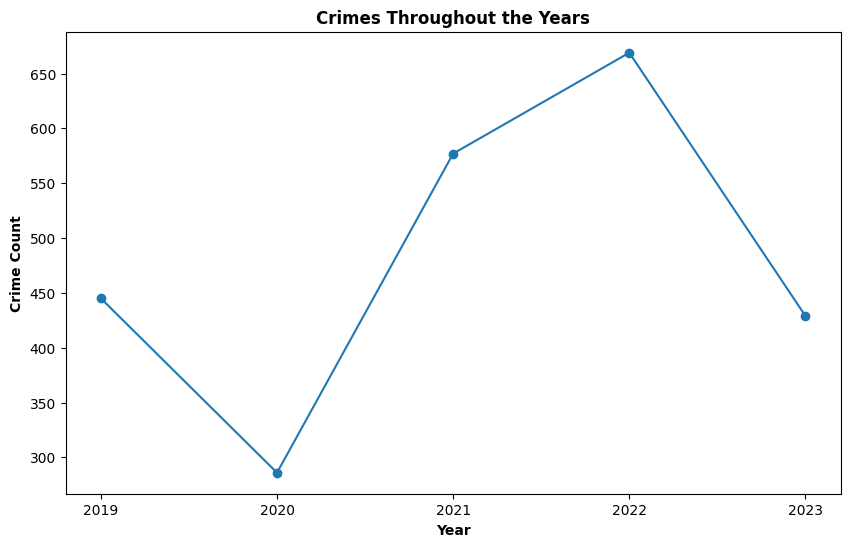

In [12]:
# Her tarihin tekrar sayısını bulma
counts = df['year'].value_counts().sort_index()

# line plot
plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts.values, marker='o', linestyle='-')

# Başlık ve y-ekseni etiketi
plt.title('Crimes Throughout the Years', fontweight='bold')
plt.ylabel('Crime Count', fontweight='bold')
plt.xlabel('Year', fontweight='bold')

# x-ekseni etiketlerini belirleme
plt.xticks([2019, 2020, 2021, 2022, 2023])

# plot
plt.show()

## **2. Aylık Trend**
Yıllar boyunca ``countplot`` kullanarak ``aylar`` boyunca suç sıklığını çizme.

In [13]:
df['month'].value_counts()

month
Mar    274
May    266
Jun    244
Apr    216
Feb    209
Jul    204
Aug    195
Sep    191
Jan    169
Oct    165
Nov    141
Dec    132
Name: count, dtype: int64

Burada, karışık sıralı aylarla karşılaşacağız, bu yüzden onu düzeltmemiz gerekiyor.

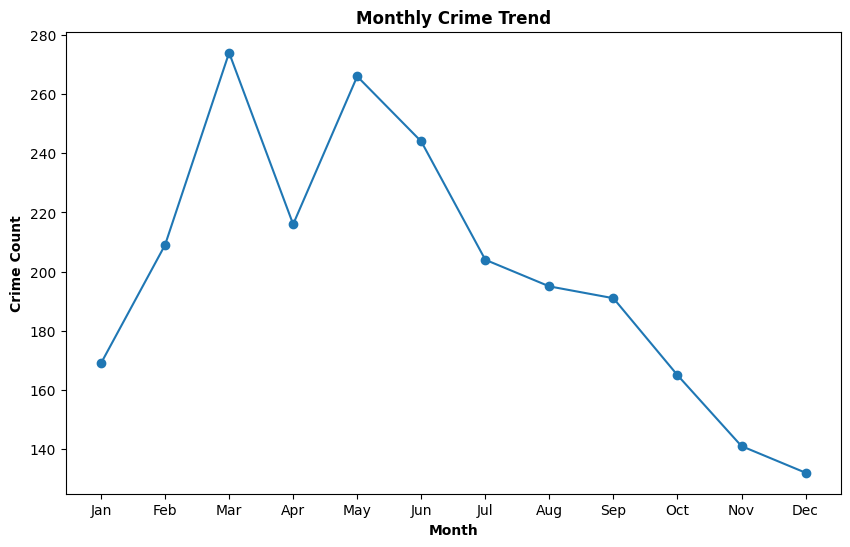

In [14]:
# defining the correct order of months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# 'month' sütununu doğru sırayla kategorik olarak dönüştürüyoruz
df['month'] = pd.Categorical(df['month'], categories = month_order, ordered=True)

# Her ayın tekrar sayısını buluyoruz
counts = df['month'].value_counts().sort_index()

# line-plot
plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts.values, marker='o', linestyle='-')

plt.title('Monthly Crime Trend', fontweight='bold')
plt.ylabel('Crime Count', fontweight='bold')
plt.xlabel('Month', fontweight='bold')

#  plotting
plt.show()

SONUÇ: Suçlar yılın başından ortasına doğru artıyor ve ardından yavaşça azalıyor.

## **3. Yıllara göre Aylık Trend**
Biraz daha derine inmek için, her bir yıl için Aylık Trendi analiz edeceğiz.

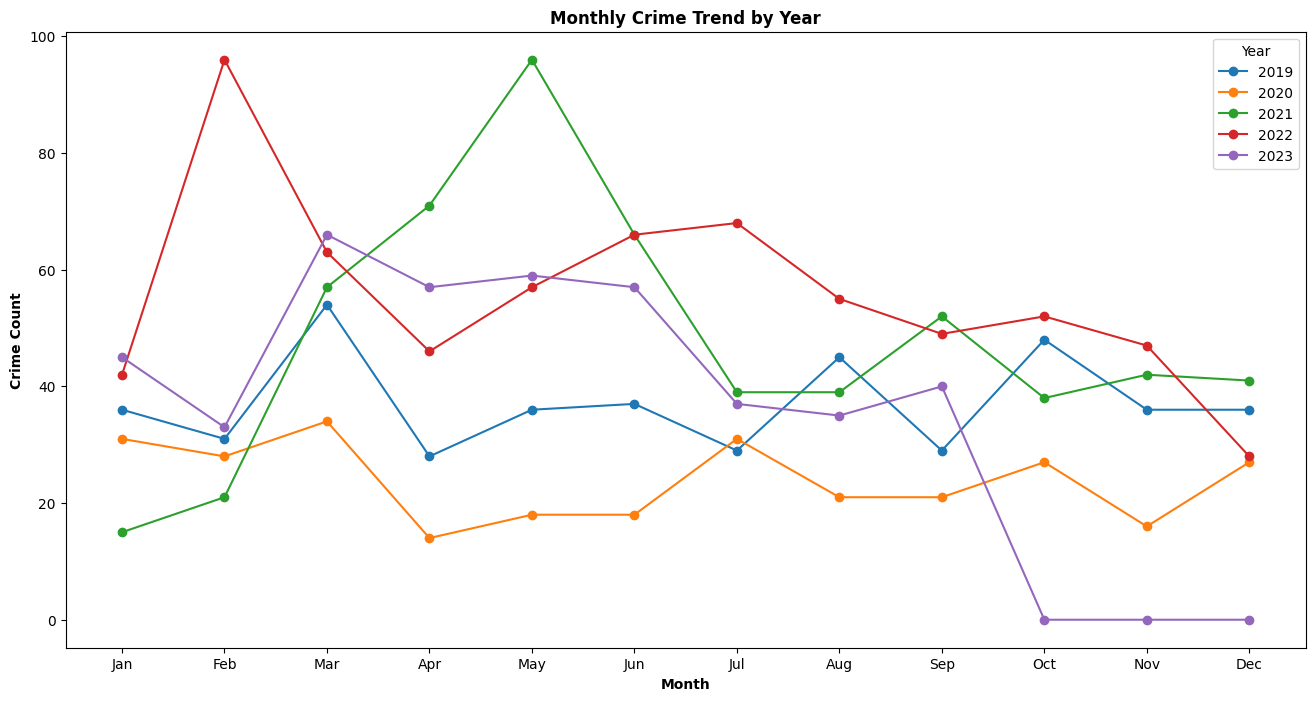

In [15]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df['month'] = pd.Categorical(df['month'], categories = month_order, ordered = True)

counts = df['month'].value_counts().sort_index()


unique_years = df['year'].unique()

plt.figure(figsize=(16, 8))
for year in unique_years:
    
    year_data = df[df['year'] == year]
    
    year_month_counts = year_data['month'].value_counts().sort_index()
    
    plt.plot(year_month_counts.index, year_month_counts.values, marker='o', linestyle='-', label=str(year))


plt.title('Monthly Crime Trend by Year', fontweight='bold')
plt.ylabel('Crime Count', fontweight='bold')
plt.xlabel('Month', fontweight='bold')


plt.legend(title='Year')


plt.show()


`SONUÇ:` Hemen hemen tüm yılların benzer bir deseni izlediği görülebilir ancak `2021` ve `2022` yılları sırasıyla yılın başında biraz farklıdır ve daha sonra doygunlaşırlar.

## **4. Haftalık Trend**
Suç sıklığını `haftanın` günleri üzerinde bir `countplot` kullanarak çizme.

In [16]:
df['day'].value_counts()

day
Tue    385
Thu    359
Fri    354
Mon    349
Sun    337
Wed    331
Sat    291
Name: count, dtype: int64

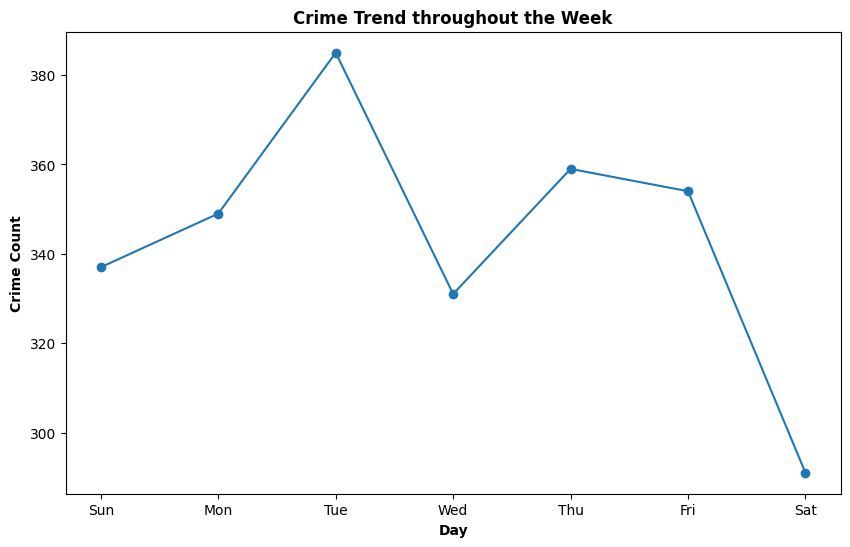

In [17]:
day_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

df['day'] = pd.Categorical(df['day'], categories = day_order, ordered=True)

counts = df['day'].value_counts().sort_index()

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(counts.index, counts.values, marker='o', linestyle='-')

plt.title('Crime Trend throughout the Week', fontweight='bold')
plt.ylabel('Crime Count', fontweight='bold')
plt.xlabel('Day', fontweight='bold')


plt.show()

`SONUÇ:` Suçlar haftanın başında artar ve haftanın sonunda azalır.

## **5. Devriyelerin Suç Sayıları**
Burada, ilgili devriyeler tarafından karşılaşılan ve kaydedilen toplam suç sayısını çiziyoruz.

In [18]:
df['patrol'].value_counts()

patrol
Man_S         557
Brooklyn_S    445
Brooklyn_N    374
Man_N         320
Queens_N      287
Bronx         169
Queens_S      164
Staten         90
Name: count, dtype: int64

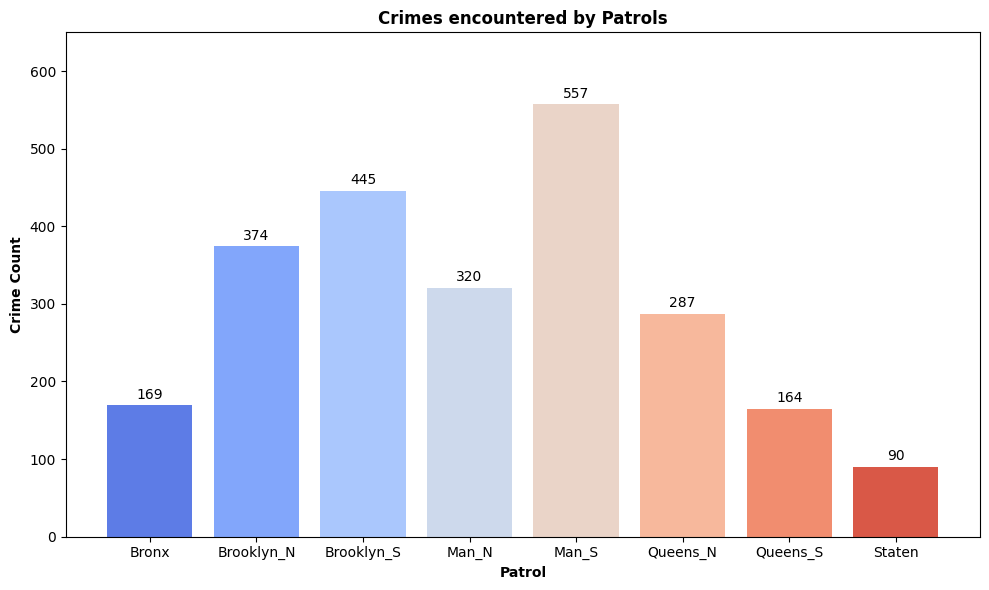

In [19]:
# Devriyelere göre Suç Sayılarını sayma
counts = df['patrol'].value_counts().sort_index()

num_patrols = len(counts)

colors = sns.color_palette("coolwarm", num_patrols)

# bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color = colors)

plt.title('Crimes encountered by Patrols', fontweight='bold')
plt.ylabel('Crime Count', fontweight='bold')
plt.xlabel('Patrol', fontweight='bold')

plt.ylim(0, 650)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


`SONUÇ:` Dolayısıyla, **Manhattan Güney Devriyesi** en yüksek suç sayısına rastladı, **Staten Island** ise en düşük sayıda suçla karşılaştı.

## **6. İlçeler Boyunca Suçlar**
Suç dağılımını ilçeler boyunca analiz ediyoruz.

In [20]:
df['county'].value_counts()

county
New york    877
Kings       819
Queens      451
Bronx       169
Richmond     90
Name: count, dtype: int64

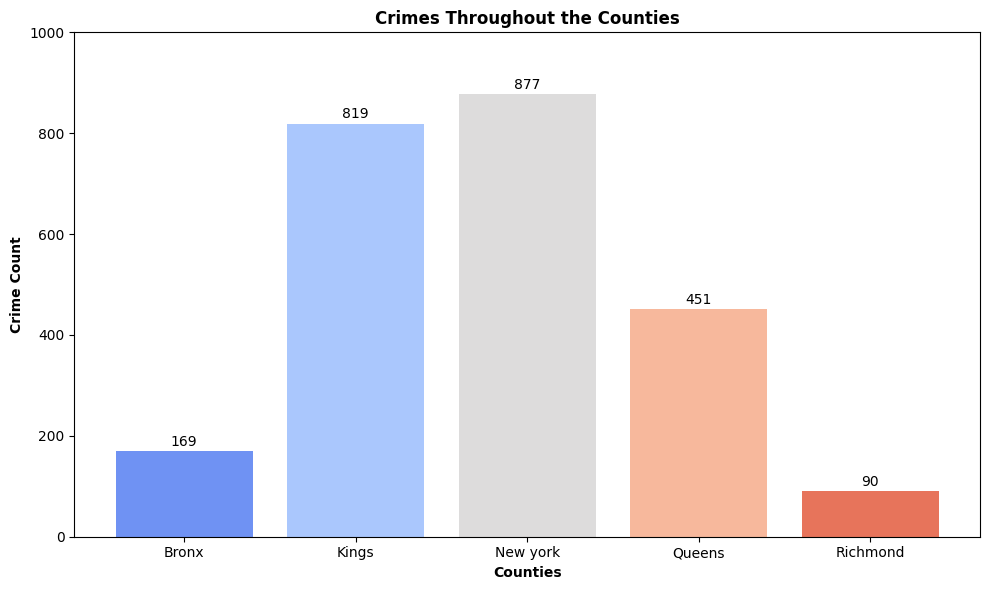

In [21]:
# İlçelere göre suç sayılarını sayma
counts = df['county'].value_counts().sort_index()

num_counties = len(counts)

colors = sns.color_palette("coolwarm", num_counties)

plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color=colors)
plt.title('Crimes Throughout the Counties', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Counties', fontweight = 'bold')

plt.ylim(0, 1000)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

`SONUÇ:` `New York` ve `Kings` ilçelerinde kaydedilen suçların sayısı en yüksektir.

## **7. Kategoriye Göre Suç Dağılımı**
Suç dağılımını `kategorilere` göre analiz ediyoruz.

In [22]:
df['crime'].value_counts()

crime
Misdemeanor      1232
Felony           1152
Violation          20
Investigation       2
Name: count, dtype: int64

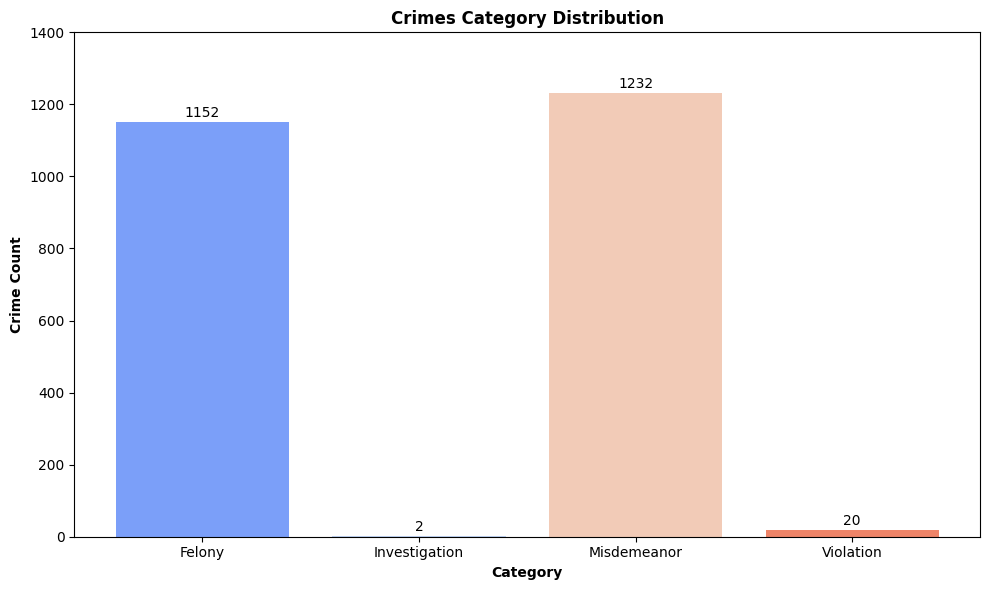

In [23]:
counts = df['crime'].value_counts().sort_index()
num_counties = len(counts)
colors = sns.color_palette("coolwarm", num_counties)

plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color=colors)

plt.title('Crimes Category Distribution', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Category', fontweight = 'bold')
plt.ylim(0, 1400)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

`SONUÇ:` En yaygın suçlar `Felony` ve `Misdemeanor`dir.

## **8. Motive Göre Suç Dağılımı**
Burada, suçun `motive`ine göre dağılımını görüyoruz.

In [24]:
df['motive'].value_counts()

motive
Anti-jewish                          1034
Anti-male homosexual (gay)            318
Anti-asian                            317
Anti-black                            211
Anti-white                             97
Anti-other ethnicity                   93
Anti-transgender                       63
Anti-muslim                            63
Anti-hispanic                          61
Anti-catholic                          44
Anti-female homosexual (lesbian)       33
Anti-female                            14
Anti-lgbt (mixed group)                11
Anti-gender non-conforming              8
Anti-arab                               7
Anti-hindu                              6
Anti-other religion                     5
Anti-sikh                               4
Anti-buddhist                           3
Anti-religious practice generally       3
Anti-multi-racial groups                3
Anti-jehovahs witness                   2
Anti-protestant                         2
Anti-eastern orthodox      

In [25]:
counts = df['motive'].value_counts()
counts.head(5)

motive
Anti-jewish                   1034
Anti-male homosexual (gay)     318
Anti-asian                     317
Anti-black                     211
Anti-white                      97
Name: count, dtype: int64

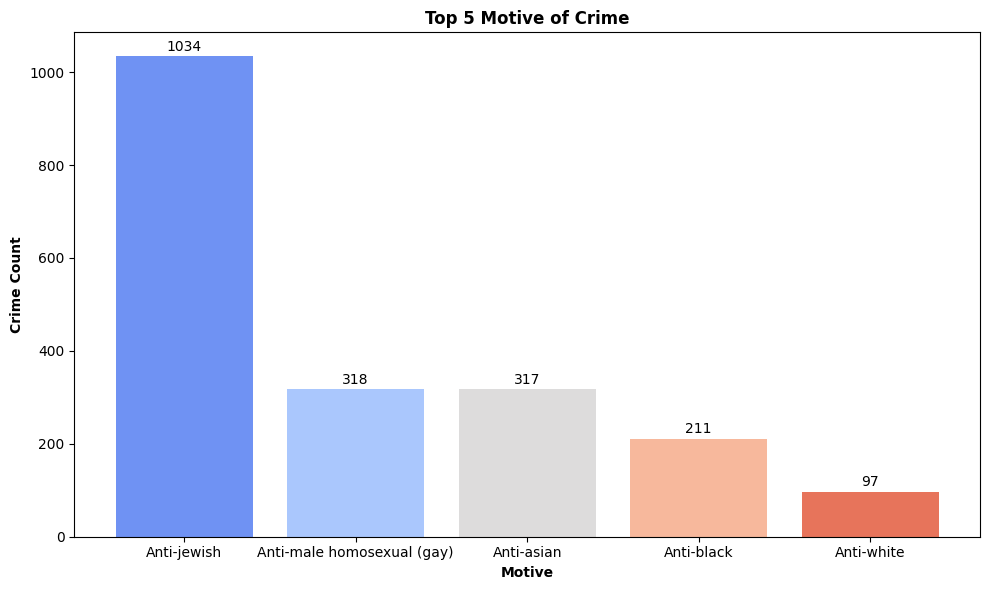

In [26]:
counts = df['motive'].value_counts()
top_5_counts = counts.head(5)

colors = sns.color_palette("coolwarm", len(top_5_counts))

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_counts.index, top_5_counts.values, color=colors)

plt.title('Top 5 Motive of Crime', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Motive', fontweight = 'bold')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

`SONUÇ:` `Anti-jewish` suçun en yaygın nedenidir.

## **9. Suç Türüne Göre Suç Dağılımı**
Burada, suçun `suç` türüne göre dağılımını görüyoruz.

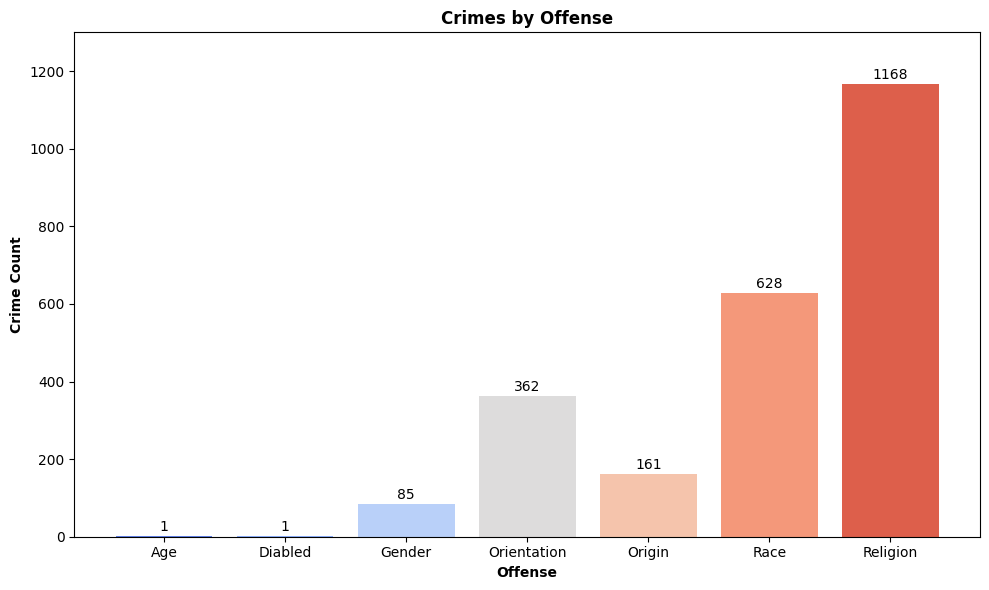

In [27]:
counts = df['offense'].value_counts().sort_index()
num_counties = len(counts)
colors = sns.color_palette("coolwarm", num_counties)

plt.figure(figsize=(10, 6))
bars = plt.bar(counts.index, counts.values, color=colors)

plt.title('Crimes by Offense', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Offense', fontweight = 'bold')
plt.ylim(0, 1300)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

`SONUÇ:` `Din` suçun en yaygın sebebidir.

## **10. En Yaygın Karakol**
Suçun `Karakollar` boyunca dağılımını analiz ediyoruz.

In [28]:
df['precinct'].value_counts()

precinct
90    106
14     87
18     73
19     72
13     70
     ... 
42      8
43      7
41      6
47      6
69      3
Name: count, Length: 77, dtype: int64

In [29]:
top_precincts = df['precinct'].value_counts()
top_precincts.head(5)

precinct
90    106
14     87
18     73
19     72
13     70
Name: count, dtype: int64

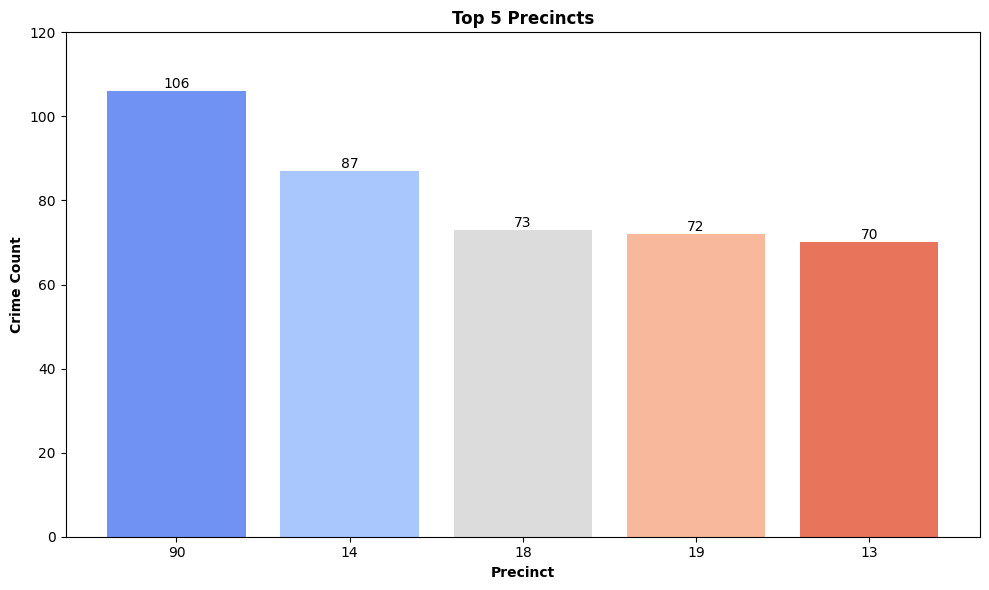

In [30]:
counts = df['precinct'].value_counts()
top_5_counts = counts.head(5)

colors = sns.color_palette("coolwarm", len(top_5_counts))

plt.figure(figsize=(10, 6))
bars = plt.bar(top_5_counts.index, top_5_counts.values, color=colors)

plt.title('Top 5 Precincts', fontweight = 'bold')
plt.ylabel('Crime Count', fontweight = 'bold')
plt.xlabel('Precinct', fontweight = 'bold')

plt.ylim(0, 120)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()

`SONUÇ:` Dolayısıyla, `Karakol 90` en fazla suç olayının yaşandığı yer olmuştur.

In [31]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2406 entries, 0 to 2405
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   date      2406 non-null   int32   
 1   month     2406 non-null   category
 2   year      2406 non-null   int32   
 3   day       2406 non-null   category
 4   patrol    2406 non-null   object  
 5   county    2406 non-null   object  
 6   crime     2406 non-null   object  
 7   motive    2406 non-null   object  
 8   offense   2406 non-null   object  
 9   precinct  2406 non-null   object  
dtypes: category(2), int32(2), object(6)
memory usage: 137.1+ KB


,date,month,year,day,patrol,county,crime,motive,offense,precinct
0,1,Jan,2019,Tue,Brooklyn_S,Kings,Misdemeanor,Anti-jewish,Religion,71
1,2,Jan,2019,Wed,Man_S,New york,Felony,Anti-arab,Origin,14
2,3,Jan,2019,Thu,Man_N,New york,Misdemeanor,Anti-jewish,Religion,20
3,3,Jan,2019,Thu,Man_N,New york,Misdemeanor,Anti-jewish,Religion,20
4,3,Jan,2019,Thu,Man_S,New york,Misdemeanor,Anti-male homosexual (gay),Orientation,5


In [32]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


# 'month' sütununu numerik değerlere dönüştür
month_dict = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
df['month'] = df['month'].map(month_dict)

# Label encoding için sütunları seç
label_encode_columns = ['day', 'patrol', 'county', 'crime', 'motive', 'offense']

# Label encoding yap
label_encoder = LabelEncoder()
for column in label_encode_columns:
    df[column] = label_encoder.fit_transform(df[column])



## **Korelasyon Matrisi Hesaplama**

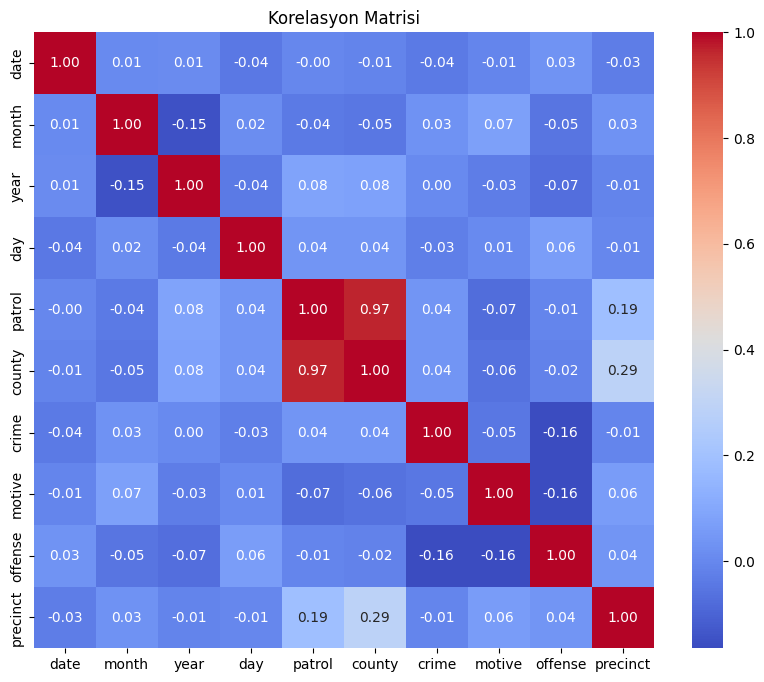

In [33]:
correlation_matrix = df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

## **Öznitelik Seçimi**

In [34]:
# Bağımsız değişkenler ve bağımlı değişken ayırma
X = df.drop('precinct', axis=1)
y = df['precinct']

# Öznitelik seçimi yap
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(X, y)

# Her özelliğin p-değerlerini ve p-değerlerine göre sıralanmış bir listeyi al sonra Özellikler ve p-değerlerini birleştir
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Feature', 'Score']

# P-değerlerine göre özellikleri sıralama
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# En iyi 5 özelliği seçme
selected_features = feature_scores.head(5)['Feature'].tolist()
print("En iyi 5 özellik:")
print(selected_features)


En iyi 5 özellik:
['patrol', 'county', 'motive', 'date', 'month']


## **Eksik Değer Analizi**

In [35]:
df.isnull().sum()

date        0
month       0
year        0
day         0
patrol      0
county      0
crime       0
motive      0
offense     0
precinct    0
dtype: int64